In [120]:
from subprocess import check_output
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
print(check_output(["ls", "data"]).decode("utf8"))

import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, DBSCAN
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

data = pd.read_csv("data/hmeq.csv")
data.groupby('BAD').size()

hmeq.csv



BAD
0    4771
1    1189
dtype: int64

In [121]:
data.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [122]:
data.dropna(inplace=True)

In [123]:
#Пустые значения
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [124]:
data['JOB'].unique()

array(['Other', 'Office', 'Mgr', 'ProfExe', 'Sales', 'Self'], dtype=object)

In [125]:
#Размерность таблицы
data.shape

(3364, 13)

In [126]:
data = data.drop('VALUE', 1)
data.groupby('BAD').size()

BAD
0    3064
1     300
dtype: int64

In [127]:
#Замена строковых типов числовым
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

data.head()

,BAD,LOAN,MORTDUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,0,343,1,2,9,0,0,552,1,8,2104
7,1,1,313,1,2,11,0,0,370,0,8,2057
19,0,2,2688,1,1,2,0,0,407,0,13,1117
25,1,3,420,1,0,12,0,0,155,1,21,2341
26,0,3,2621,1,1,4,0,0,450,0,13,893


In [128]:
#Проверка замены типов
data['JOB'].unique()

array([2, 1, 0, 3, 4, 5])

In [129]:
#X = data.drop('BAD', axis=1)
#y = data['BAD']
#X.head()

In [131]:
categorical_features = ['BAD']
continious_features = ['LOAN', 'MORTDUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'CLNO', 'DEBTINC']
data[continious_features].describe()

,LOAN,MORTDUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,CLNO,DEBTINC
count,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.00000,3364.000000,3364.000000,3364.000000,3364.00000
mean,157.778537,1659.676576,0.295779,1.947979,9.105826,0.146849,0.278537,1681.50000,1.037158,22.094530,22.094530,1681.50000
std,90.776529,957.342720,0.456460,1.139914,7.580715,0.579524,0.806237,971.24748,1.547576,9.314474,9.314474,971.24748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
25%,91.000000,831.750000,0.000000,1.000000,3.000000,0.000000,0.000000,840.75000,0.000000,16.000000,16.000000,840.75000
50%,141.000000,1656.500000,0.000000,2.000000,7.000000,0.000000,0.000000,1681.50000,1.000000,21.000000,21.000000,1681.50000
75%,209.250000,2489.250000,1.000000,3.000000,13.000000,0.000000,0.000000,2522.25000,2.000000,27.000000,27.000000,2522.25000
max,467.000000,3321.000000,1.000000,5.000000,36.000000,10.000000,9.000000,3363.00000,12.000000,56.000000,56.000000,3363.00000


In [132]:
dummies = pd.get_dummies(data['BAD'], prefix=col)
dt = pd.concat([data, dummies], axis = 1)
dt.drop('BAD', axis = 1, inplace = True)

In [133]:
dt.head()

,LOAN,MORTDUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DEBTINC_0,DEBTINC_1
5,0,343,1,2,9,0,0,552,1,8,2104,0,1
7,1,313,1,2,11,0,0,370,0,8,2057,0,1
19,2,2688,1,1,2,0,0,407,0,13,1117,1,0
25,3,420,1,0,12,0,0,155,1,21,2341,0,1
26,3,2621,1,1,4,0,0,450,0,13,893,1,0


In [134]:
dt.shape

(3364, 13)

In [135]:
mms = MinMaxScaler()
mms.fit(dt)
data_transformed = mms.transform(dt)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [136]:
Sum = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    Sum.append(km.fit(data_transformed).inertia_)

Sum

[2725.8973171958296,
 2014.622251083283,
 1513.284258775122,
 1345.8989460583678,
 1247.522488895818,
 1173.7122631711948,
 1110.6681632778464,
 1050.1188039185263,
 1001.4914982299572,
 954.7776942052028,
 920.81912219703,
 894.0345417872971,
 875.8235420210319,
 852.1261718510924]

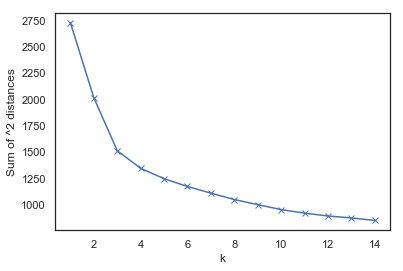

In [137]:
plt.plot(K, Sum, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of ^2 distances')
plt.show()

In [138]:
# clustering
n_clusters = 4
km = KMeans(n_clusters=n_clusters).fit(data)

centroids = km.cluster_centers_
print(centroids)

[[7.91717418e-02 1.41232643e+02 1.42457125e+03 2.98416565e-01
  1.82338611e+00 7.14859927e+00 1.87576127e-01 2.26552984e-01
  7.79161998e+02 1.01705238e+00 1.90803898e+01 8.49252132e+02]
 [5.33769063e-02 1.93180828e+02 2.69022440e+03 2.67973856e-01
  2.04139434e+00 9.48039216e+00 9.15032680e-02 2.17864924e-01
  2.39484967e+03 1.13507625e+00 2.58747277e+01 2.08290305e+03]
 [4.51127820e-02 1.38521303e+02 8.78887218e+02 3.39598997e-01
  2.07017544e+00 1.19210526e+01 1.24060150e-01 3.17042607e-01
  2.55428947e+03 7.31829574e-01 2.12619048e+01 1.16493108e+03]
 [1.81378476e-01 1.53488513e+02 1.50254051e+03 2.81741233e-01
  1.85006046e+00 7.91656590e+00 1.89842805e-01 3.60338573e-01
  9.43263603e+02 1.24304716e+00 2.16940750e+01 2.56059250e+03]]


In [139]:
scaler = StandardScaler()
X = scaler.fit_transform(dt.drop('DEBTINC_0', 1))
X = scaler.fit_transform(dt.drop('DEBTINC_1', 1))

data['cluster'] = km.fit_predict(X)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [140]:
data.head(10)

,BAD,LOAN,MORTDUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,cluster
5,1,0,343,1,2,9,0,0,552,1,8,2104,1
7,1,1,313,1,2,11,0,0,370,0,8,2057,1
19,0,2,2688,1,1,2,0,0,407,0,13,1117,0
25,1,3,420,1,0,12,0,0,155,1,21,2341,1
26,0,3,2621,1,1,4,0,0,450,0,13,893,0
34,0,4,2714,1,1,1,0,0,477,0,13,926,0
35,0,4,2720,1,1,2,0,0,557,0,13,915,0
36,1,4,10,1,2,16,3,0,905,2,8,1898,1
37,1,4,1436,0,0,2,0,0,3012,3,37,3328,1
38,0,5,2725,1,1,2,0,0,339,0,14,1170,0


In [141]:
data.groupby('cluster').size()

cluster
0     783
1     303
2    1077
3    1201
dtype: int64

In [142]:
(data['cluster'] - data['BAD']).apply(abs).mean()

1.7122473246135552

In [143]:
val_1 = data[(data.BAD == 0) & (data.cluster == 0)]
val_1.size

10179

In [144]:
val_2 = data[(data.BAD == 0) & (data.cluster == 1)]
val_2.size

78

In [145]:
val_3 = data[(data.BAD == 1) & (data.cluster == 0)]
val_3.size

0

In [146]:
val_4 = data[(data.BAD == 1) & (data.cluster == 1)]
val_4.size

3861

In [147]:
val_5 = data[(data.BAD == 0) & (data.cluster == 2)]
val_5.size

13962

In [148]:
val_6 = data[(data.BAD == 0) & (data.cluster == 3)]
val_6.size

15613

In [149]:
val_7 = data[(data.BAD == 1) & (data.cluster == 2)]
val_7.size

39

In [150]:
val_8 = data[(data.BAD == 1) & (data.cluster == 3)]
val_8.size

0

In [151]:
data.size - val_1.size - val_2.size

33475

In [152]:
algorithms = []
algorithms.append(km)
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=2, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=2))

y = data['cluster']
dt = []
for algo in algorithms:
    algo.fit(X)
    dt.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=dt, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.999026,0.998132,0.998158,0.998133,0.998146,0.115518
Affinity,0.021627,0.202840,0.930691,0.222534,0.359185,0.404879
Spectral,-0.000557,0.003044,0.003428,0.174409,0.006725,0.224711
Agglomerative,0.137795,0.181998,0.182282,0.625773,0.282325,0.282137


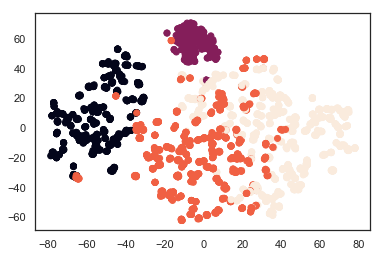

In [153]:
# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(X)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=y)
plt.show()

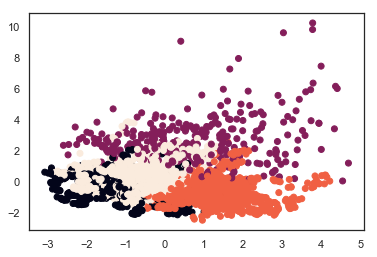

In [154]:
# Определяем модель
dbscan = DBSCAN()
 
# Обучаем
dbscan.fit(X)
 
# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

x_axis = pca_2d[:, 0]
y_axis = pca_2d[:, 1]

plt.scatter(x_axis, y_axis, c=y)
plt.show()